In [36]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import seaborn as sns

In [37]:
#cargamos los datos de entrada
data = pd.read_csv("./car_data.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(301, 9)

In [38]:
#Veamos los primeros registros
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [40]:
# Checking Null values
data.isnull().sum()*100/data.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

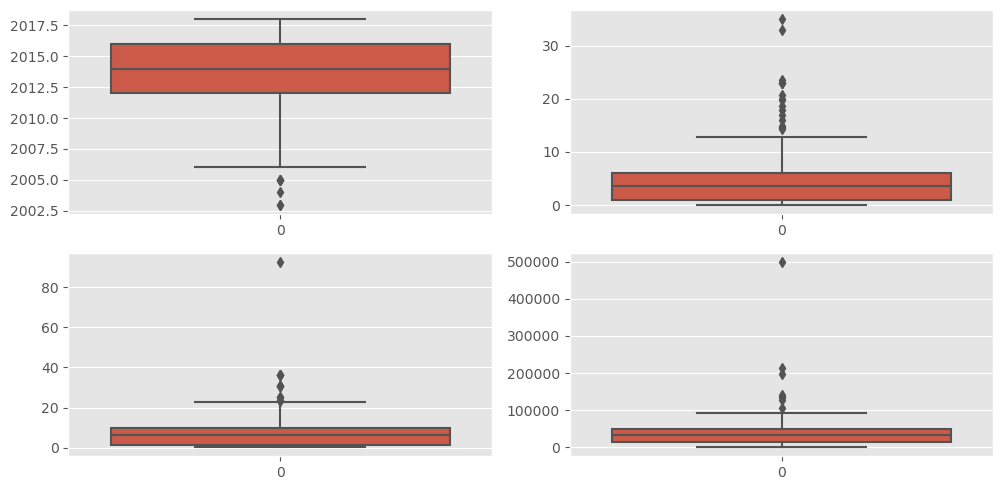

In [41]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(data['Year'], ax = axs[0,0])
plt2 = sns.boxplot(data['Selling_Price'], ax = axs[0,1])
plt3 = sns.boxplot(data['Present_Price'], ax = axs[1,0])
plt1 = sns.boxplot(data['Kms_Driven'], ax = axs[1,1])

plt.tight_layout()

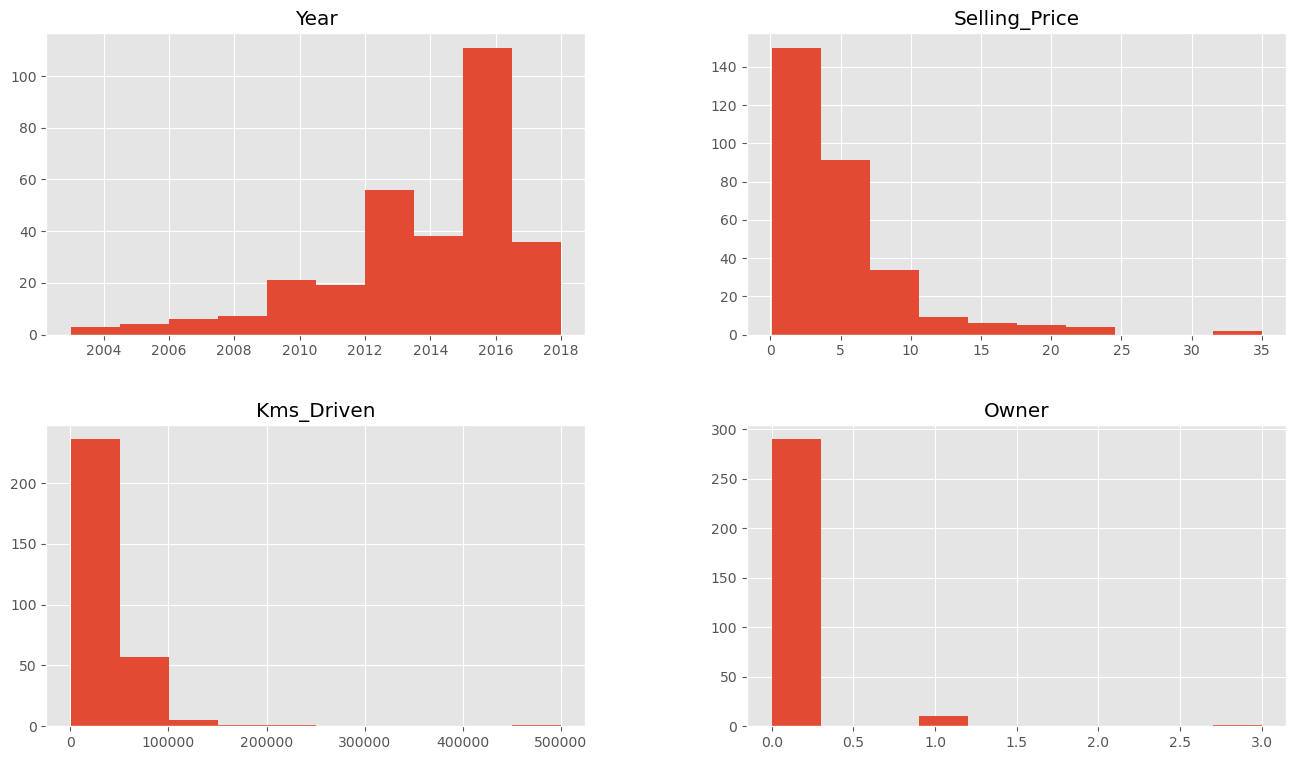

In [42]:
data.drop(['Car_Name', 'Fuel_Type', 'Present_Price'], axis=1, inplace=True)
data.hist()
plt.show()

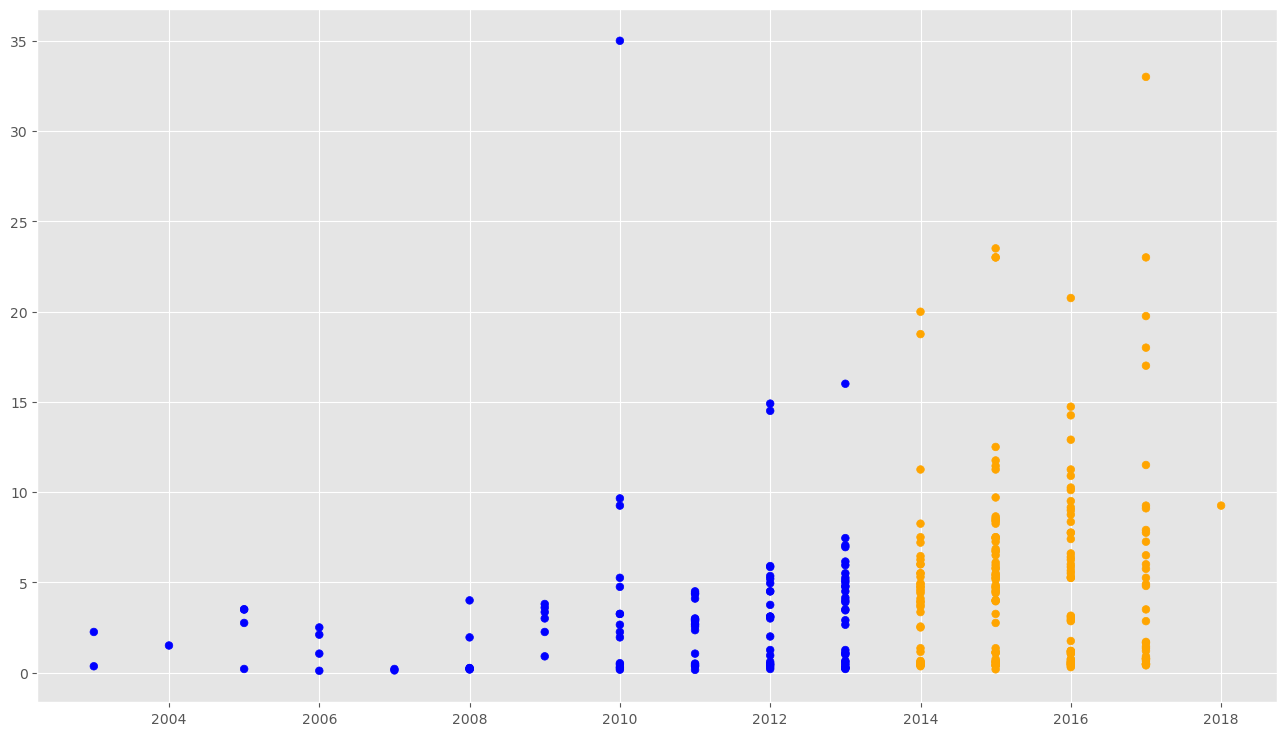

In [57]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 2018
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Year'] <= 2018) & (data['Selling_Price'] <= 500000)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_data['Year'].values
f2 = filtered_data['Selling_Price'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media el año
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Year']>2013):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [56]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Year"]]
X_train = np.array(dataX)
y_train = filtered_data['Selling_Price'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.41509169]
Independent term: 
 -831.1789245913267
Mean squared error: 24.31
Variance score: 0.06


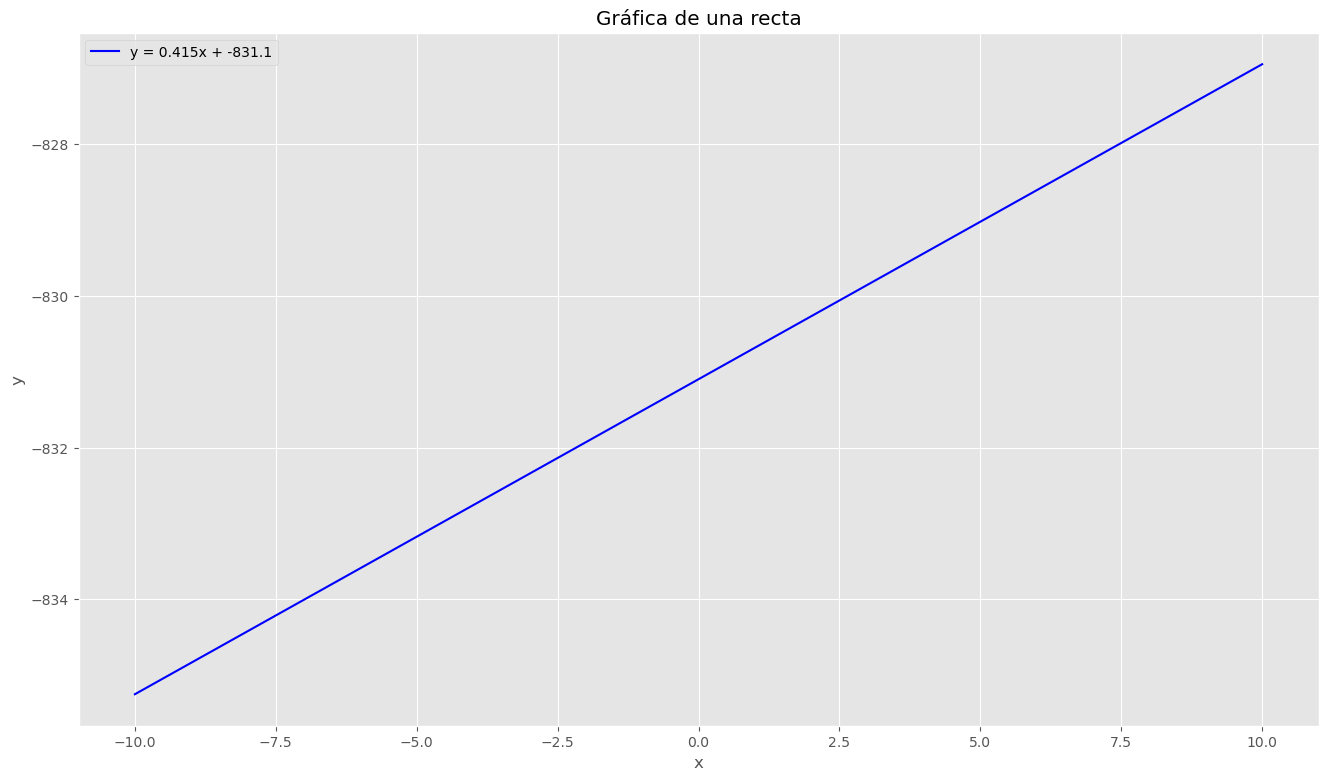

In [59]:
# Definir la pendiente y la ordenada al origen
m = 0.415  # pendiente
b = -831.1  # ordenada al origen

# Generar valores de x
x = np.linspace(-10, 10, 100)  # Valores de -10 a 10 con 100 puntos

# Calcular los valores de y utilizando la ecuación de la recta
y = m * x + b

# Graficar la recta
plt.plot(x, y, color='blue', label=f'y = {m}x + {b}')

# Etiquetas de los ejes y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de una recta')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

In [62]:
#Vamos a comprobar:
# Quiero predecir cuántos cuantos seria el precio de un auto 2018
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2018]])
print(int(y_Dosmil[0]))

6
